#  Question 1 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

In [1]:
# import necessary modules
import matplotlib.pyplot as plt 
import numpy as np

# (a) Newman 7.2
For 7.2(a), We will investigate sunspots and their behaviour as a function of time. We first downlaoad sunspot.txt and plot a graph of the sunspots over time.

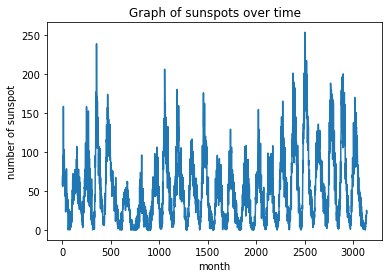

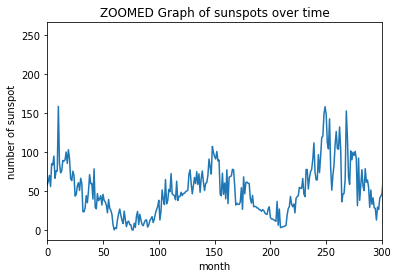

In [2]:
#load data from file
s = np.loadtxt("sunspots.txt",float)

# plot data
plt.plot(s[:,0],s[:,1]) #plot the first and second column of the array
plt.title("Graph of sunspots over time")
plt.xlabel("month")
plt.ylabel("number of sunspot")
plt.show()

#zoom in the region of interest to estimate the cycle 
plt.plot(s[:,0],s[:,1]) #plot the first and second column of the array
plt.title("ZOOMED Graph of sunspots over time")
plt.xlabel("month")
plt.ylabel("number of sunspot")
plt.xlim(0,300) # zoom in to the region from 0 to 300 months
plt.show()

By looking at the graph, we see a clear oscillatory pattern with fluctuations around the general trend. In the zoomed in graph we can see 3 distinct oscillations, and so we estimate the length of the cyle to be about 100 months.

For (b), We will analyze this function using fourier transforms to find the exact periods of sunspot oscillations. We first define the discrete fourier transform function using the example given in the text book. We will then plot the power spectrum graph and observe it.

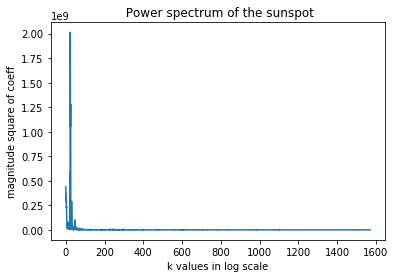

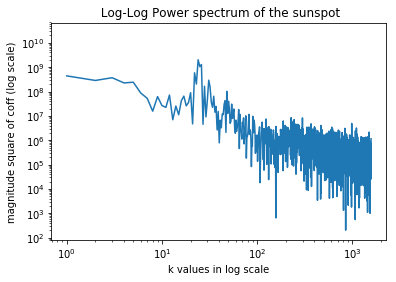

In [3]:
#define the discrete fourier transform function
#use the same function from the text book
def dft(y):
    N = len(y)
    c = np.zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

# save coefficients from the fourier transform of sunspots
c = dft(s[:,1])
power=(abs(c))**2 # convert coeffients to power spectrum
# power = real(c)**2 + imag(c)**2
plt.figure() # plot resulting power spectrum
plt.plot(power[1:]) # ignore first element (where k=0)
plt.title(" Power spectrum of the sunspot")
plt.xlabel("k values in log scale")
plt.ylabel("magnitude square of coeff")
plt.show()
plt.figure() # Also plot log-log scale of power spectrum
plt.loglog(power) #use log scale
plt.title(" Log-Log Power spectrum of the sunspot")
plt.xlabel("k values in log scale")
plt.ylabel("magnitude square of coff (log scale)")
plt.show()

There is noticeable peak in the power spectrum at a nonzero value of k. It is located around k=20. This indicates that there is a dominant frequency in the fourier series, i.e. it has a higher amplitude than any other frequency. In the next section we will find the exact value of max(k).

For (c), we will find the exact value of k using the max function.


In [4]:
#find the exact value of k using numpy.amax function
#the actual max value is when k=0 because when k=0, C is the mean of the functions
maxi = np.where(power==max(power[1:])) #find the index of max value
maxv = power[maxi] #find the max value

#other than k=0 , max occurs at k=maxi and c**2 is maxv
print("Maximum value of magnitude square of c is:",maxv)
print("k corresponding maximum value of c is",maxi) #k=24
#N/k=period
period=3143/24 #period=130.95
print("Length of the cycle of the sunspot is:",period)

Maximum value of magnitude square of c is: [  2.01433713e+09]
k corresponding maximum value of c is (array([24]),)
Length of the cycle of the sunspot is: 130.95833333333334


We note that the power spectrum has a maximum when k=0, but this is because when k=0, C is the mean of the functions. To find the actual maximum value (dominant frequency), we take the maximum of the array ignoring the first value, and save that index. We find this ''next biggest'' value at k=24. To find the period of the sine wave with the value of k, use the formula $\text{Period} = N/k$.

As seen above, we get a period of 130.96 months, which is also approximately the period we estimated in part (a)! We then say with certianty that the cycle length of sunspots is 130.96 months.

# (b) Newman 7.4

In this problem, we will examine the Dow Jones Industrial Average using fourier transforms. We use the given file dow.txt and plot the data on the graphs, and compare various elements. The first graph is obtained by applying the Fast fourier transform using rfft function to calculate coefficients, and keeping only the first 10% of elements and set rest to zero. We then apply inverse fourier transform to get the smoothed version of original data.
The last graph is obatained in the same way as the first one but only difference is that we will keep only 2% of data instead of 10%. Finally, we will plot all three graphs in the same graph and compare those.

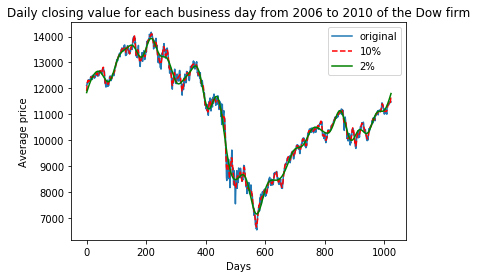

In [5]:
#laod data from file
d = np.loadtxt("dow.txt",float)
#plot the graph of the file 
plt.plot(d,label='original') #plot the original data
plt.title("Daily closing value for each business day from 2006 to 2010 of the Dow firm")
plt.xlabel("Days")
plt.ylabel("Average price")

#(b)
#Calculate the coefficients of the discrete Fourier transform of 
#data using the function rfft from numpy.fft
c=np.fft.rfft(d) 
#array of c has N/2 +1 elements where N is the number of elements of array 'd'

#(c)
N = d.shape[0] #find the total number of elements  in data 'd' which has same number as 'c'
#set all but the first 10% of the elements of array c
c[N//10:]=0

#(d)
#Apply inverse Fourier transform to 'c' using the function irfft, 
#and plot it on the same graph as the original data
inverse=np.fft.irfft(c) 
plt.plot(inverse,'r--',label="10%")
#It is little off from original because setting the coeffienct 
#to zero will remove lots of terms with frequencies

#(e)
#Modify to set all but the first 2% of the coefficients to zero and repeat the process
c1=np.fft.rfft(d)
c1[(N//100)*2:]=0
#Apply inverse Fouier transform to 'c1'
inverse2=np.fft.irfft(c1)
#Plot it on the same graph as the origianl data and 10% data
plt.plot(inverse2,'g',label="2%")
plt.legend()
plt.show()

We observe that when we discard more information from the coefficents, the function becomes more smoother.
Therefore, graph with only 2% of data is most smooth, but as we discard more data, the function is more deviated from the original data. The graph of 10% of data was closer to the origianl data then the 2% one.

# (c) Newman 7.6

In this problem we will compare the DFT and DCT.
Since the code is not required I will just briefly comment the code.

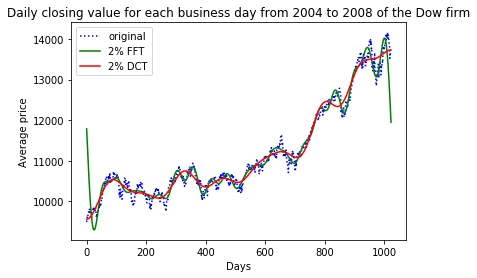

In [6]:
#(a)
#load data
d2=np.loadtxt("dow2.txt",float)
#calculate coefficients using rfft
c2=np.fft.rfft(d2)
# set all but the first 2% of the coefficients to zero
c2[(N//100)*2:]=0
#apply inverse fourier function using irfft
inverse3=np.fft.irfft(c2)
#plot the graph of original data and 2% data
plt.plot(d2,'b:',label='original')
plt.plot(inverse3,'g',label="2% FFT")
plt.title("Daily closing value for each business day from 2004 to 2008 of the Dow firm")
plt.xlabel("Days")
plt.ylabel("Average price")


#(b)
#Modify program using function from dcst.py(provided) and repeat the process
# 1D DCT Type-II
def dct(y):
    N = len(y)
    y2 = np.empty(2*N,float)
    y2[:N] = y[:]
    y2[N:] = y[::-1]

    c = np.fft.rfft(y2)
    phi = np.exp(-1j*np.pi*np.arange(N)/(2*N))
    return np.real(phi*c[:N])

# 1D inverse DCT Type-II

def idct(a):
    N = len(a)
    c = np.empty(N+1,complex)

    phi = np.exp(1j*np.pi*np.arange(N)/(2*N))
    c[:N] = phi*a
    c[N] = 0.0
    return np.fft.irfft(c)[:N]
#calculate coefficients using Type-II discrete cosine transform (DCT) of real data 
c3=dct(d2)
#use only 2% of c3
c3[(N//100)*2:]=0
#apply inverse fourier transform
inverse4=idct(c3)
#plot the 2% data using DCT
plt.plot(inverse4,'r',label="2% DCT")
plt.legend()
plt.show()

Using only 2% of the coefficients from the discrete fourier transform makes the original data graph more smooth but there is an additional artifact at the beginning and the end of the plot which is very deviated from the origianl data. It is because the discrete fourier transform require the function to be periodic which means each ends of the values should match.
Therefore, we used Discrete cosine transform to fix this. Again, we discard all but the first 2% of the coefficients, invert the transforms and plot the result. There was a significant improvement with less deviation at the each ends of the interval. The reason is that cosine transform does not assume that the function is periodic and it does not require the first and the last of the original data to be the same value.

# (d) Newman 7.3

In this problem, we will do Fourier transfoms of piano and trumpet
Since the code is not required I will just briefly comment the code.

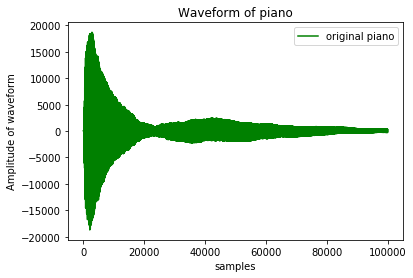

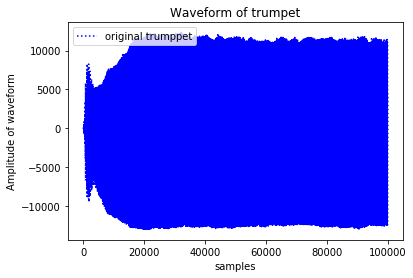

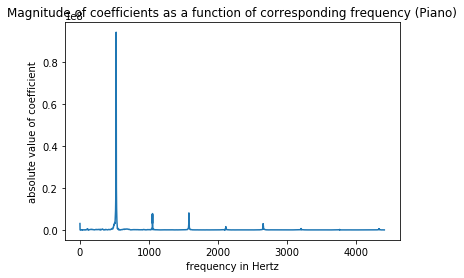

Frequency of piano is [ 524.79]


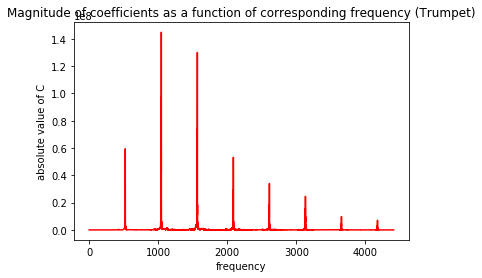

In [7]:
#load data
p = np.loadtxt("piano.txt",float)
t = np.loadtxt("trumpet.txt",float)
#plot the waveform of piano and trumpet
plt.plot(p,color='green',label='original piano')
plt.legend()
plt.title("Waveform of piano")
plt.xlabel("samples")
plt.ylabel("Amplitude of waveform")
plt.show()
plt.plot(t,'b:',label='original trumppet')
plt.title("Waveform of trumpet")
plt.xlabel("samples")
plt.ylabel("Amplitude of waveform")
plt.legend()
plt.show()

#apply Fast fourier transform to calculate the coefficients
pc=np.fft.rfft(p) 
tc=np.fft.rfft(t)
#use only the first 10000 coefficients
pc1=pc[:10000]
tc1=tc[:10000]

#Piano
#calculate the freq (in Hertz) by using function numpy.fft.rfftfreq 
freq=np.fft.rfftfreq(len(p))
#plot the magnitude of coefficients as a function of frequency
plt.plot(freq[:10000]*44100,abs(pc1))
plt.xlabel("frequency in Hertz")
plt.ylabel("absolute value of coefficient")
plt.title("Magnitude of coefficients as a function of corresponding frequency (Piano)")
plt.show()
#Find the maximum frequency
maxi = np.where(abs(pc1)==max(abs(pc1))) #find index of max c
maxv = freq[maxi] #find the frequency corresponding max c
print ("Frequency of piano is", maxv*44100) 

#Trumpet
#plot the magnitude of coeffients as a function of frequency
plt.plot(freq[:10000]*44100,abs(tc1),color='r')
plt.xlabel("frequency")
plt.ylabel("absolute value of C")
plt.title("Magnitude of coefficients as a function of corresponding frequency (Trumpet)")
plt.show()

Since piano and trumpet was playing at the same note, and note is related to frequency so the dominant frequency of piano and trumpet should be same.
We observed that in each graph of magnitude of coefficients for piano and trumpet there are distinct several values higher than values around it. 
For piano, there was really one frequency that dominate the other frequencies and the value was 524.79 Hz and other small peaks at the every other 500Hz. 
For trumpet, the frequency with biggest value of coefficient was almost double of the piano one (around 1000Hz). but it also had relatively small peaks at the every other 500Hz
There is a reason why many frequencies need to be excited to play the single note.
It is because human ear percieve frequencies logarithmically.
And graph of trumpet and piano shows the linear frequency progression (500Hz,1000Hz,1500Hz,2000Hz and so on).
To reproduce the logarithmic progression of an equal temperament from linear frequency progression, trumpet and piano need to excite all spectrum of frequencies. 
To find out what note was playing, I looked at the piano graph because it really has the very distinct dominant frequency (524.79Hz).
The closest note I found was C5 (True frequency of C5 is 523.251 Hz).
